<a href="https://colab.research.google.com/github/kungfupanda1/pythonclass-project-3/blob/main/Intermediate_Python_Class_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib as plt
import numpy as np
import seaborn as sns
import pandas.plotting as plotting

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Open_Parking_and_Camera_Violations.csv')

df2 = df.filter(['Plate','License Type','Summons Number','Issue Date','Violation Time','Violation','Fine Amount','Payment Amount','Precinct','County',"Violation Status"])
display(df2)

This data is all violation given by the traffic department to passenger vehicle in 2020. This data excludes those violation that are still pending or have no determination.

In [ ]:
df2.dtypes

In [162]:
df2['Violation Time'] = pd.to_datetime(df2['Violation Time'])
df2['Issue Date'] = pd.to_datetime(df2['Issue Date'])

Changing data to date time format.


In [163]:
df2['Violation Hour'] = df2['Violation Time'].dt.hour
df2['Violation Month'] = df2['Issue Date'].dt.month
df2['County'].replace({"BX":"Bronx","K":"Brooklyn","NY":"Manhattan","Q":"Queens","R":"Staten Island"}, inplace = True)

Add 2 calculated columns into dataset. Want to be able to group violation time and issue date into groups. In addition, did some data relabel for the county.

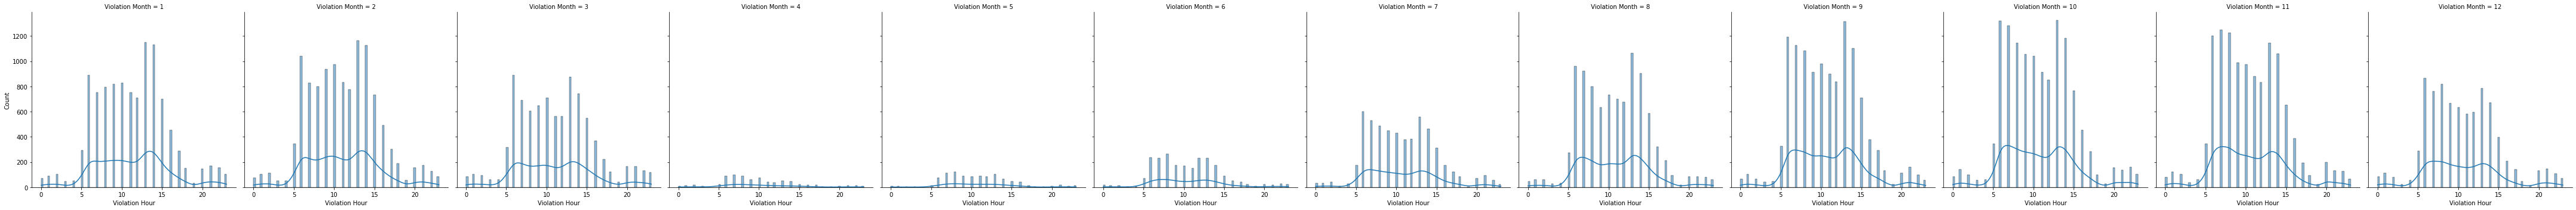

In [71]:
sns.displot(data=df2, x="Violation Hour", col="Violation Month", kde=True)

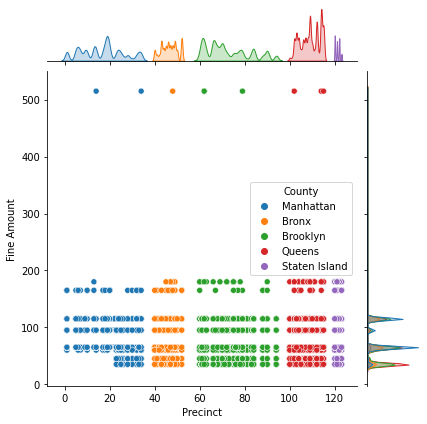

In [173]:
sns.jointplot(x='Precinct', y='Fine Amount', data=df2, hue='County')

From this joint graph, you can see that the highest are issued in Queens and the average fine amount between 50 to 150.

                 count  percentage
Violation Month                   
1                67285       11.76
2                65160       11.39
3                53617        9.37
4                 4058        0.71
5                 8330        1.46
6                15443        2.70
7                36542        6.39
8                59025       10.32
9                65898       11.52
10               65874       11.51
11               59653       10.43
12               71211       12.45


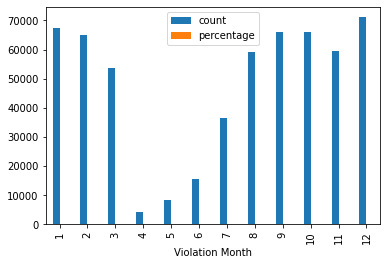

In [174]:
df2_allmonth =df2.reset_index().groupby(['Violation Month']).size().to_frame('count')
df2_allmonth['percentage'] = round(df2_allmonth['count'].div(572096).mul(100),2)
print (df2_allmonth)
df2_allmonth.plot.bar()

Peak months of issuing violation by traffic department is from June to March. This was an effort to see if there is a correlation between end of fiscal year and increase in issuing a violation, to see if they have a quota. 

                count  percentage
Violation Hour                   
0                2383        0.42
1                2000        0.35
2                1775        0.31
3                1019        0.18
4                 756        0.13
5                4984        0.87
6               17899        3.13
7               33292        5.82
8               54039        9.45
9               53990        9.44
10              48953        8.56
11              55937        9.78
12              57400       10.03
13              68636       12.00
14              56901        9.95
15              38066        6.65
16              30153        5.27
17              20557        3.59
18               6588        1.15
19               1520        0.27
20               5360        0.94
21               4794        0.84
22               3039        0.53
23               2055        0.36


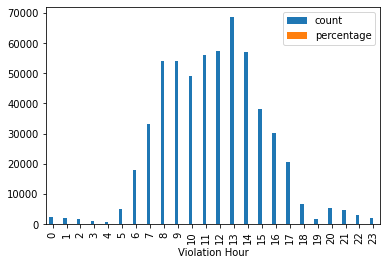

In [175]:
df2_alltime =df2.reset_index().groupby(['Violation Hour']).size().to_frame('count')
df2_alltime['percentage'] = round(df2_alltime['count'].div(572096).mul(100),2)
print (df2_alltime)
df2_alltime.plot.bar()

Peak hours of issuing a violation is between 6 AM to 5 PM.

                count  percentage
County                           
Bronx           78918       13.79
Brooklyn       163609       28.60
Manhattan      145586       25.45
Queens         170025       29.72
Staten Island   13958        2.44


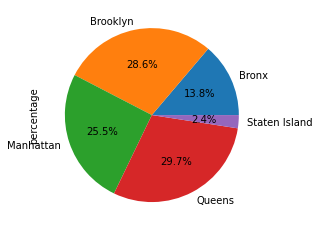

In [176]:
df2_allborough =df2.reset_index().groupby(['County']).size().to_frame('count')
df2_allborough['percentage'] = round(df2_allborough['count'].div(572096).mul(100),2)
print (df2_allborough)
df2_allborough['percentage'].plot.pie(autopct="%.1f%%")

3 boroughs have the most issuing of violation.

In [145]:
df2_allstatus =df2.reset_index().groupby(['Violation Status']).size().to_frame('count').sort_values(['count'], ascending=False)
df2_allstatus['percentage'] = round(df2_allstatus['count'].div(572096).mul(100),2)
print (df2_allstatus)

                                count  percentage
Violation Status                                 
HEARING HELD-GUILTY            344259       60.18
HEARING HELD-NOT GUILTY        202525       35.40
HEARING ADJOURNMENT             13330        2.33
APPEAL AFFIRMED                  5700        1.00
HEARING HELD-GUILTY REDUCTION    1723        0.30
ADMIN CLAIM DENIED               1596        0.28
APPEAL REVERSED                  1542        0.27
ADMIN REDUCTION                   633        0.11
ADMIN CLAIM GRANTED               447        0.08
APPEAL ABANDONED                  340        0.06
APPEAL MODIFIED                     1        0.00


Roughly 60% of violation resulted in being guilty and 35% resulted in not guilty.

In [178]:
df2['Violation'].unique()

array(['INSP. STICKER-EXPIRED/MISSING', 'FAIL TO DSPLY MUNI METER RECPT',
       'EXPIRED MUNI METER', 'NO STANDING-DAY/TIME LIMITS', 'SAFETY ZONE',
       'FIRE HYDRANT', 'FRONT OR BACK PLATE MISSING',
       'NO STANDING-EXC. TRUCK LOADING', 'NO STANDING-COMM METER ZONE',
       'NO STANDING-BUS STOP', 'NO MATCH-PLATE/STICKER', 'DOUBLE PARKING',
       'NO PARKING-STREET CLEANING', 'IMPROPER REGISTRATION',
       'REG. STICKER-EXPIRED/MISSING', 'NO PARKING-DAY/TIME LIMITS',
       'NO STANDING-EXC. AUTH. VEHICLE', "INSP STICKER-MUTILATED/C'FEIT",
       'NON-COMPLIANCE W/ POSTED SIGN', 'BIKE LANE', 'SIDEWALK',
       'NO STANDING-HOTEL LOADING', 'NO STANDING-BUS LANE',
       'NO STANDING-TAXI STAND', 'CROSSWALK',
       'NO PARKING-EXC. HOTEL LOADING', "REG STICKER-MUTILATED/C'FEIT",
       'IDLING', 'FEEDING METER', 'NO STANDING EXCP D/S',
       'OBSTRUCTING DRIVEWAY', 'VIN OBSCURED', 'UNALTERED COMM VEHICLE',
       'PEDESTRIAN RAMP', 'NO STOPPING-DAY/TIME LIMITS',
       'NO PAR

In [148]:
df2_alltype =df2.reset_index().groupby(['Violation']).size().to_frame('count').sort_values(['count'], ascending=False).head(10)
df2_alltype['percentage'] = round(df2_alltype['count'].div(572096).mul(100),2)
display(df2_alltype)

,count,percentage
Violation,,
FAIL TO DSPLY MUNI METER RECPT,136206,23.81
NO PARKING-STREET CLEANING,61264,10.71
NO STANDING-DAY/TIME LIMITS,45770,8.00
INSP. STICKER-EXPIRED/MISSING,40077,7.01
FRONT OR BACK PLATE MISSING,39262,6.86
FIRE HYDRANT,36851,6.44
NO PARKING-DAY/TIME LIMITS,35099,6.14
REG. STICKER-EXPIRED/MISSING,34813,6.09
EXPIRED MUNI METER,32763,5.73


Top 10 Violations.

In [155]:
df2_streetcleaning = df2[df2['Violation']=='NO PARKING-STREET CLEANING']
df2_streetcleaning =df2_streetcleaning.reset_index().groupby(['County']).size().to_frame('count')
df2_streetcleaning['percentage'] = round(df2_streetcleaning['count'].div(61264).mul(100),2)
display(df2_streetcleaning)

,count,percentage
County,,
Bronx,8691,14.19
Brooklyn,24974,40.76
Manhattan,9810,16.01
Queens,17784,29.03
Staten Island,5,0.01


In [177]:
df2_meter = df2[df2['Violation']=='FAIL TO DSPLY MUNI METER RECPT']
df2_meter =df2_meter.reset_index().groupby(['County']).size().to_frame('count')
df2_meter['percentage'] = round(df2_meter['count'].div(61264).mul(100),2)
display(df2_meter)

,count,percentage
County,,
Bronx,13713,22.38
Brooklyn,40846,66.67
Manhattan,26992,44.06
Queens,52044,84.95
Staten Island,2611,4.26


In [156]:
df2_inspection = df2[df2['Violation']=='INSP. STICKER-EXPIRED/MISSING']
df2_inspection =df2_inspection.reset_index().groupby(['County']).size().to_frame('count')
df2_inspection['percentage'] = round(df2_inspection['count'].div(40077).mul(100),2)
display(df2_inspection)

,count,percentage
County,,
Bronx,6299,15.72
Brooklyn,12937,32.28
Manhattan,7636,19.05
Queens,10497,26.19
Staten Island,2708,6.76


###There are many things I learnt about violations such as peak time of issuing violation, which is from 6AM to 5PM. In addition, you would less likely receive a violation from April to June compared to the rest of the year. Interesting facts that 35% tickets were considered "Not Guilty" after a hearing. The odds are not in favor of fighting a violations and if there was more data on violation duration, we would  have seen if it was worthwhile. The top violation were due to meter parking and the most violation was issued in Queens, followed by Brooklyn and Manhattan. This make sense as these 3 boroughs are heavily populated compared to the rest. 